In [40]:
import numpy as np
from numpy.random import normal
import numpy.linalg as la
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

## local files
import sys
sys.path.append('..\\')
sys.path.append('..\\utilities')
from physconsts import *
from rbconsts import *

### detuned Rabi oscillations finite upper state lifetime - constant Rabi frequency

In [22]:
## simple Rabi oscillation in two level atom

rho0 = np.array([1,0,0], complex) # population starts in |0>

delta = 2*np.pi*0.1
omega = 2*np.pi # the rabi frequency

# atom+field Hamiltonian, hbar=1
gamma = 2*np.pi*0.1
T2 = np.inf

numsteps = 100
tmin = 0
tmax = 3 
tpts = np.linspace(tmin,tmax,numsteps)

def drho(t,state):
    rgg, reg, ree = state
    rge = np.conj(reg)
    rgg_dot = ree*gamma - 0.5*1j*(omega*rge - omega*reg)
    reg_dot = (1j*delta - 1/T2)*reg - 0.5*1j*omega*(ree - rgg)
    ree_dot = -ree*gamma + 0.5*1j*(omega*rge - omega*reg)
    return rgg_dot, reg_dot, ree_dot
soln = solve_ivp(drho,[tmin,tmax], rho0, t_eval=tpts,vectorized=True)

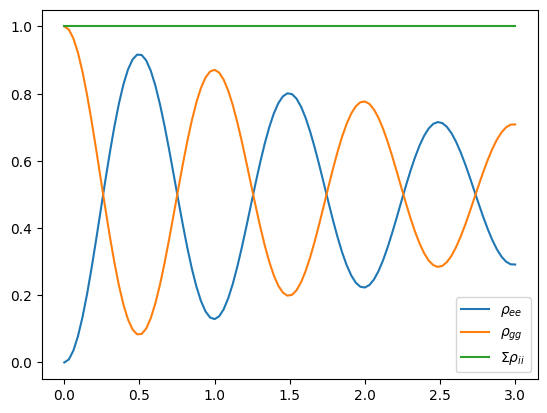

In [23]:
labels = ['|0>','|1>']
rgg, reg, ree = soln.y
plt.plot(soln.t,np.real(ree),label=r'$\rho_{ee}$')
plt.plot(soln.t,np.real(rgg),label=r'$\rho_{gg}$')
plt.plot(soln.t,np.real(rgg+ree),label=r"$\Sigma\rho_{ii}$")
plt.legend(loc='best')

### detuned Rabi oscillations finite upper state lifetime - time varying Rabi frequency and realistic parameters

In [45]:
# network experiment off-resonant excitation of F'=2 during the pi-pulse
# to F'=0. Excitation to F'=1 is forbidden.

rho0 = np.array([1,0,0], complex) # population starts in |0>

delta = 2*np.pi*(72.218+156.947) # 2pi*MHz. F'=0 to F'=2 separation
tFWHM = 0.030 # microseconds 
tau = 0.5*tFWHM*np.sqrt(2*np.log(2))

P = 1e-4 # W
w0 = 3e-4 # um
E = np.sqrt(4*P/(c*e0*np.pi*w0**2))
d = 1.26e-29 # F=1,m=0 to F'=2,m'=0. The C.G. coeff to F'=1,m=0 is 0.  
omega0 = (d*E)*1e6 # 2pi*MHz, hbar=1
print("Rabi f.:",omega0/(2*np.pi), "MHz")
omega = lambda t: omega0*np.exp(-0.5*(t/tau)**2) # the rabi frequency

# atom+field Hamiltonian, hbar=1
gamma = 2*np.pi*6.066 # 5P3/2 lifetime 2pi MHz. ignore lifetime dependence on F
T2 = np.inf

numsteps = 1000
tmin = -3*tFWHM
tmax = 3*tFWHM
tpts = np.linspace(tmin,tmax,numsteps)

def drho(t,state):
    rgg, reg, ree = state
    rge = np.conj(reg)
    rgg_dot = ree*gamma - 0.5*1j*(omega(t)*rge - omega(t)*reg)
    reg_dot = (1j*delta - 1/T2)*reg - 0.5*1j*omega(t)*(ree - rgg)
    ree_dot = -ree*gamma + 0.5*1j*(omega(t)*rge - omega(t)*reg)
    return rgg_dot, reg_dot, ree_dot
soln = solve_ivp(drho,[tmin,tmax], rho0, t_eval=tpts,vectorized=True)

Rabi f.: 1.4639955774467661e-21 MHz


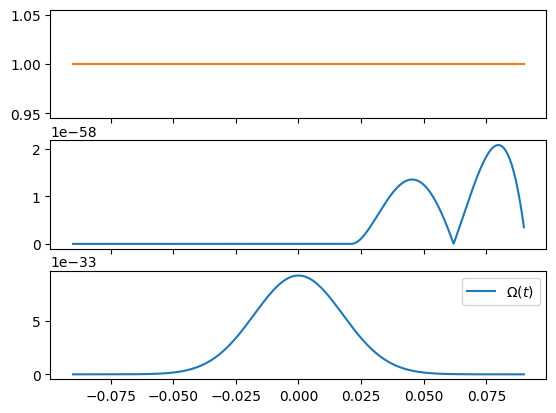

In [43]:
labels = ['|0>','|1>']
rgg, reg, ree = soln.y
fig, axes = plt.subplots(nrows=3, sharex=True)
ax,ax2,ax3 = axes
ax2.plot(soln.t,np.abs(ree),label=r'$\rho_{ee}$')
ax.plot(soln.t,np.abs(rgg),label=r'$\rho_{gg}$')
ax.plot(soln.t,np.abs(rgg+ree),label=r"$\Sigma\rho_{ii}$")
ax3.plot(soln.t, omega(soln.t), label=r'$\Omega(t)$')
plt.legend(loc='best')
plt.show()

### detuned Rabi oscillations finite upper state lifetime - time varying Rabi frequency

In [38]:
## simple Rabi oscillation in two level atom

rho0 = np.array([1,0,0], complex) # population starts in |0>

delta = 2*np.pi*0.01
tFWHM = 2
tau = tFWHM*np.sqrt(2*np.log(2))
omega = lambda t: 2*np.pi*np.exp(-0.5*(t/tau)**2) # the rabi frequency

# atom+field Hamiltonian, hbar=1
gamma = 2*np.pi*0.1
T2 = np.inf

numsteps = 1000
tmin = -10
tmax = 20
tpts = np.linspace(tmin,tmax,numsteps)

def drho(t,state):
    rgg, reg, ree = state
    rge = np.conj(reg)
    rgg_dot = ree*gamma - 0.5*1j*(omega(t)*rge - omega(t)*reg)
    reg_dot = (1j*delta - 1/T2)*reg - 0.5*1j*omega(t)*(ree - rgg)
    ree_dot = -ree*gamma + 0.5*1j*(omega(t)*rge - omega(t)*reg)
    return rgg_dot, reg_dot, ree_dot
soln = solve_ivp(drho,[tmin,tmax], rho0, t_eval=tpts,vectorized=True)

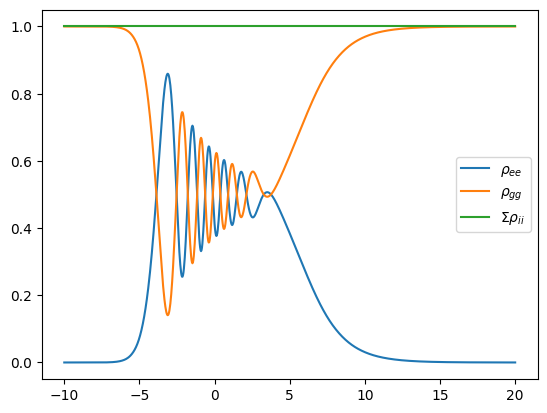

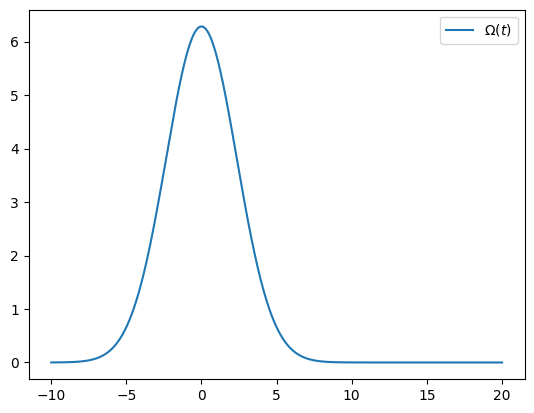

In [39]:
labels = ['|0>','|1>']
rgg, reg, ree = soln.y
plt.plot(soln.t,np.abs(ree),label=r'$\rho_{ee}$')
plt.plot(soln.t,np.abs(rgg),label=r'$\rho_{gg}$')
plt.plot(soln.t,np.abs(rgg+ree),label=r"$\Sigma\rho_{ii}$")
plt.legend(loc='best')
plt.show()
plt.plot(soln.t, omega(soln.t), label=r'$\Omega(t)$')
plt.legend(loc='best')